This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1) #0~1 사이의 숫자 랜덤으로 noise에 붙임

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1) #0으로만 noise에 붙임

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
mnist.load_data?

In [5]:
train_images.shape

(60000, 784)

In [6]:
np.random.random((len(train_images), 784)).shape

(60000, 784)

In [7]:
train_images_with_noise_channels.shape

(60000, 1568)

In [8]:
np.random.random((len(train_images), 784)) #noise channel

array([[0.89718434, 0.33156214, 0.19467255, ..., 0.88365983, 0.10996753,
        0.12062997],
       [0.21466606, 0.66638069, 0.31371097, ..., 0.81407762, 0.79952039,
        0.82224258],
       [0.98592562, 0.99721591, 0.69992536, ..., 0.08819348, 0.65676782,
        0.65543756],
       ...,
       [0.19282845, 0.74867083, 0.34222377, ..., 0.76576367, 0.12699073,
        0.4283726 ],
       [0.88906054, 0.85017729, 0.98793659, ..., 0.6027186 , 0.99785188,
        0.06995372],
       [0.94652452, 0.25843044, 0.50058132, ..., 0.82679643, 0.36821864,
        0.50837955]])

In [10]:
train_images_with_noise_channels.shape #784*2=1568

(60000, 1568)

In [11]:
np.zeros((len(train_images), 784))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Training the same model on MNIST data with noise channels or all-zero channels**

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2) #noise_channel 붙인 모델

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2) #zero_channel 붙인 모델

Epoch 1/10
375/375 [==============================] - 7s 4ms/step - loss: 0.6158 - accuracy: 0.8126 - val_loss: 0.2701 - val_accuracy: 0.9174
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2545 - accuracy: 0.9198 - val_loss: 0.2665 - val_accuracy: 0.9193
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1659 - accuracy: 0.9482 - val_loss: 0.1412 - val_accuracy: 0.9582
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1180 - accuracy: 0.9634 - val_loss: 0.1320 - val_accuracy: 0.9604
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0883 - accuracy: 0.9719 - val_loss: 0.1256 - val_accuracy: 0.9622
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0641 - accuracy: 0.9797 - val_loss: 0.1354 - val_accuracy: 0.9597
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0477 - accuracy: 0.9850 - val_loss: 0.1324 - val_accuracy: 0.9634
Epoch 

**Plotting a validation accuracy comparison**

validation accuracy

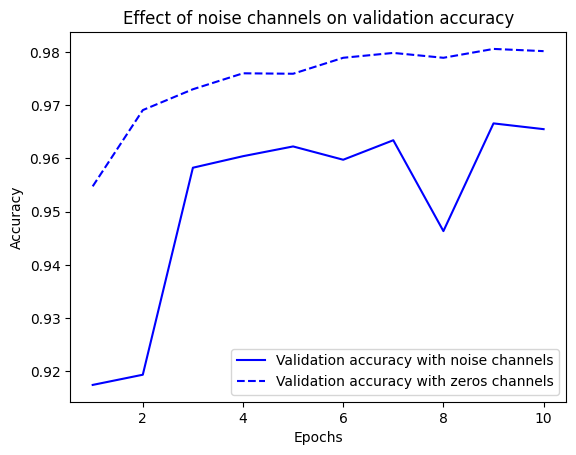

In [13]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

Training accuracy

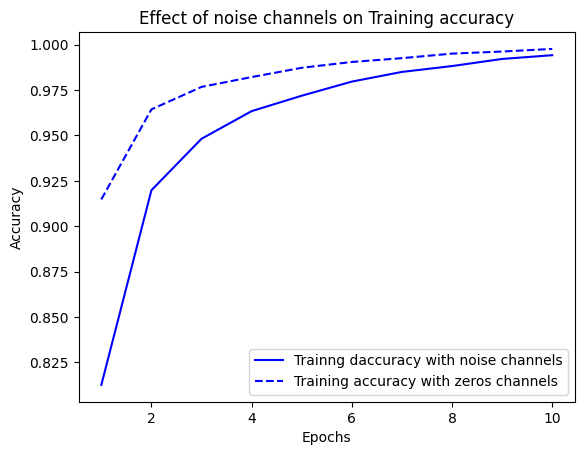

In [14]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["accuracy"]
val_acc_zeros = history_zeros.history["accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Trainng daccuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Training accuracy with zeros channels")
plt.title("Effect of noise channels on Training accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

모형 training 하기전에 라벨을 random하게 shuffle

In [15]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:].copy()#copy를 해야 원래 train_label이 안바뀜
np.random.shuffle(random_train_labels)

In [ ]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
random_train_labels[:10]

array([6, 4, 6, 2, 7, 1, 4, 9, 3, 5], dtype=uint8)

In [16]:


model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3157 - accuracy: 0.1042 - val_loss: 2.3062 - val_accuracy: 0.1027
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2988 - accuracy: 0.1177 - val_loss: 2.3127 - val_accuracy: 0.1039
Epoch 3/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2908 - accuracy: 0.1293 - val_loss: 2.3142 - val_accuracy: 0.1030
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2772 - accuracy: 0.1408 - val_loss: 2.3291 - val_accuracy: 0.0988
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2624 - accuracy: 0.1509 - val_loss: 2.3348 - val_accuracy: 0.1038
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2422 - accuracy: 0.1669 - val_loss: 2.3524 - val_accuracy: 0.1006
Epoch 7/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2201 - accuracy: 0.1807 - val_loss: 2.3610 - val_accuracy: 0.1002

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

learning_rate 조정하는 방법

In [17]:
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255 #normalize

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.), # accuracy 낮아짐 -> learning rate 조정정(learningrate 너무 크면 모형이 수렴하지 않음)
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 564.2504 - accuracy: 0.3081 - val_loss: 2.6331 - val_accuracy: 0.2089
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 3.3728 - accuracy: 0.2167 - val_loss: 2.2967 - val_accuracy: 0.2209
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4647 - accuracy: 0.1985 - val_loss: 2.2796 - val_accuracy: 0.2726
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5259 - accuracy: 0.1929 - val_loss: 2.2757 - val_accuracy: 0.1952
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4023 - accuracy: 0.1969 - val_loss: 2.2469 - val_accuracy: 0.2153
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 2.4087 - accuracy: 0.1992 - val_loss: 2.1906 - val_accuracy: 0.2084
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 2.3213 - accuracy: 0.2050 - val_loss: 7.1383 - val_accuracy: 0.1937
Epoc

**The same model with a more appropriate learning rate**

In [18]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2), #learning rate가 너무 작으면 수렴 속도가 느려지긴함. 그래도 작게 하는게 나음
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3713 - accuracy: 0.9103 - val_loss: 0.1891 - val_accuracy: 0.9426
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1239 - accuracy: 0.9653 - val_loss: 0.1351 - val_accuracy: 0.9638
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0925 - accuracy: 0.9749 - val_loss: 0.1563 - val_accuracy: 0.9642
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0816 - accuracy: 0.9785 - val_loss: 0.2103 - val_accuracy: 0.9590
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0714 - accuracy: 0.9826 - val_loss: 0.1856 - val_accuracy: 0.9663
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0605 - accuracy: 0.9846 - val_loss: 0.1718 - val_accuracy: 0.9708
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0513 - accuracy: 0.9872 - val_loss: 0.1891 - val_accuracy: 0.9691
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [19]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6804 - accuracy: 0.8325 - val_loss: 0.3599 - val_accuracy: 0.9032
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3532 - accuracy: 0.9024 - val_loss: 0.3090 - val_accuracy: 0.9137
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3182 - accuracy: 0.9122 - val_loss: 0.2929 - val_accuracy: 0.9185
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3024 - accuracy: 0.9159 - val_loss: 0.2847 - val_accuracy: 0.9199
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2924 - accuracy: 0.9186 - val_loss: 0.2785 - val_accuracy: 0.9233
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2858 - accuracy: 0.9205 - val_loss: 0.2739 - val_accuracy: 0.9256
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2811 - accuracy: 0.9215 - val_loss: 0.2720 - val_accuracy: 0.9247
Epoch 

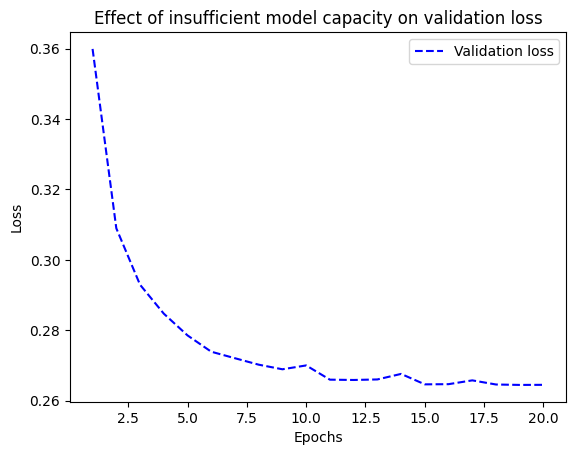

In [20]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [21]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3575 - accuracy: 0.8978 - val_loss: 0.1765 - val_accuracy: 0.9488
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1613 - accuracy: 0.9523 - val_loss: 0.1287 - val_accuracy: 0.9638
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1159 - accuracy: 0.9652 - val_loss: 0.1109 - val_accuracy: 0.9675
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0877 - accuracy: 0.9729 - val_loss: 0.1085 - val_accuracy: 0.9689
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0712 - accuracy: 0.9781 - val_loss: 0.0979 - val_accuracy: 0.9715
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0575 - accuracy: 0.9824 - val_loss: 0.0947 - val_accuracy: 0.9716
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0477 - accuracy: 0.9852 - val_loss: 0.0971 - val_accuracy: 0.9719
Epoch 

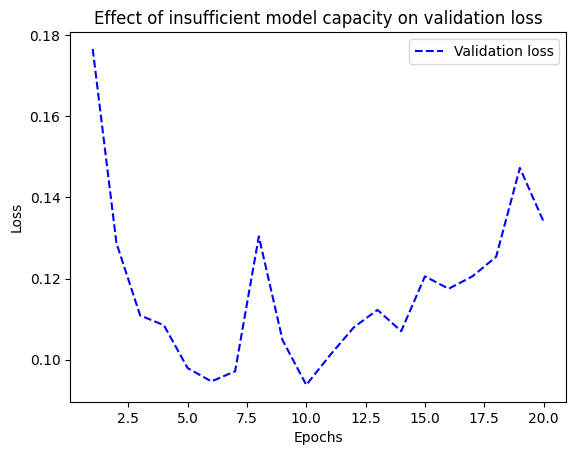

In [22]:
import matplotlib.pyplot as plt
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

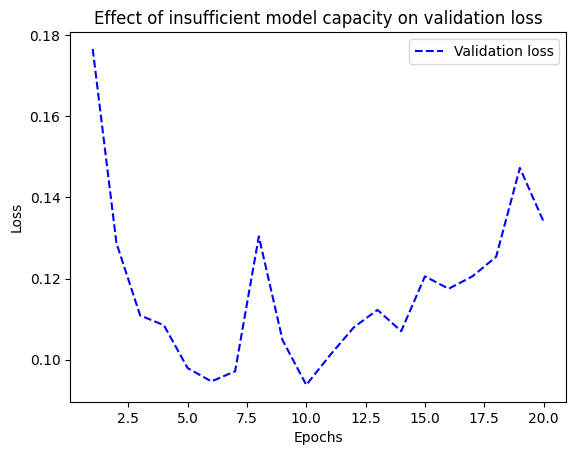

In [23]:
import matplotlib.pyplot as plt
val_loss1 = history_small_model.history["val_loss"]
val_loss2 = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [24]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 3s 56ms/step - loss: 0.5145 - accuracy: 0.7898 - val_loss: 0.3908 - val_accuracy: 0.8641
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3173 - accuracy: 0.8943 - val_loss: 0.3124 - val_accuracy: 0.8798
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2392 - accuracy: 0.9201 - val_loss: 0.2928 - val_accuracy: 0.8813
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1931 - accuracy: 0.9347 - val_loss: 0.2931 - val_accuracy: 0.8800
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1619 - accuracy: 0.9456 - val_loss: 0.2950 - val_accuracy: 0.8811
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1352 - accuracy: 0.9565 - val_loss: 0.2875 - val_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1162 - accurac

**Version of the model with lower capacity**

In [25]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 67ms/step - loss: 0.5607 - accuracy: 0.7765 - val_loss: 0.4572 - val_accuracy: 0.8580
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3900 - accuracy: 0.8889 - val_loss: 0.3668 - val_accuracy: 0.8784
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3055 - accuracy: 0.9089 - val_loss: 0.3209 - val_accuracy: 0.8844
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2537 - accuracy: 0.9243 - val_loss: 0.2975 - val_accuracy: 0.8877
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2169 - accuracy: 0.9344 - val_loss: 0.2892 - val_accuracy: 0.8876
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1897 - accuracy: 0.9433 - val_loss: 0.2782 - val_accuracy: 0.8908
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1684 - accuracy: 0.9498 - val_loss: 0.2747 - val_accuracy: 0.8910
Epoch 8/20
30

**Version of the model with higher capacity**

In [26]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 66ms/step - loss: 0.5665 - accuracy: 0.7244 - val_loss: 0.3938 - val_accuracy: 0.8291
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3202 - accuracy: 0.8668 - val_loss: 0.3250 - val_accuracy: 0.8676
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2419 - accuracy: 0.9008 - val_loss: 0.2690 - val_accuracy: 0.8889
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1858 - accuracy: 0.9275 - val_loss: 0.2709 - val_accuracy: 0.8890
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1446 - accuracy: 0.9431 - val_loss: 0.3110 - val_accuracy: 0.8791
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0860 - accuracy: 0.9693 - val_loss: 0.3475 - val_accuracy: 0.8762
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0708 - accuracy: 0.9763 - val_loss: 0.3737 - val_accuracy: 0.8853
Epoch 8/20
30

#### Adding weight regularization

**Adding L2 weight regularization to the model**

regularization하는 방법

In [27]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 53ms/step - loss: 0.6108 - accuracy: 0.7839 - val_loss: 0.4755 - val_accuracy: 0.8671
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4069 - accuracy: 0.8907 - val_loss: 0.3915 - val_accuracy: 0.8814
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3320 - accuracy: 0.9123 - val_loss: 0.3666 - val_accuracy: 0.8860
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2928 - accuracy: 0.9253 - val_loss: 0.4045 - val_accuracy: 0.8630
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2717 - accuracy: 0.9325 - val_loss: 0.3569 - val_accuracy: 0.8864
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2527 - accuracy: 0.9420 - val_loss: 0.3609 - val_accuracy: 0.8849
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2469 - accuracy: 0.9404 - val_loss: 0.3644 - val_accuracy: 0.8827
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001) #L1 regularization
regularizers.l1_l2(l1=0.001, l2=0.001) #Simultaneous L1 and L2 regularization

#### Adding dropout

**Adding dropout to the IMDB model**

**dropout 하는 방법**

In [28]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 54ms/step - loss: 0.6259 - accuracy: 0.6461 - val_loss: 0.5159 - val_accuracy: 0.8416
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5059 - accuracy: 0.7697 - val_loss: 0.4093 - val_accuracy: 0.8746
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.4357 - accuracy: 0.8185 - val_loss: 0.3660 - val_accuracy: 0.8748
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3819 - accuracy: 0.8540 - val_loss: 0.3083 - val_accuracy: 0.8883
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3370 - accuracy: 0.8770 - val_loss: 0.3074 - val_accuracy: 0.8803
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2999 - accuracy: 0.8930 - val_loss: 0.2761 - val_accuracy: 0.8928
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2666 - accuracy: 0.9076 - val_loss: 0.2743 - val_accuracy: 0.8930
Epoch 8/20
30

## Summary